# **Encoding**

El siguiente paso es hacer el encoding a las variables categóricas.

In [10]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import pickle


import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../../../')
from src import funciones_encoding as fe

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = pd.read_pickle("../../../datos/cluster_0/df_nonulls.pkl")
df.head(2)

,Ship Mode,Segment,Country,Market,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority
8,Standard Class,Corporate,United States,US,Binders,5,0.2,1906.485,867.69,Low
10,Second Class,Corporate,United States,US,Supplies,5,0.0,83.281,846.54,High


Primero comprobamos visualmente si las variables tienen orden:

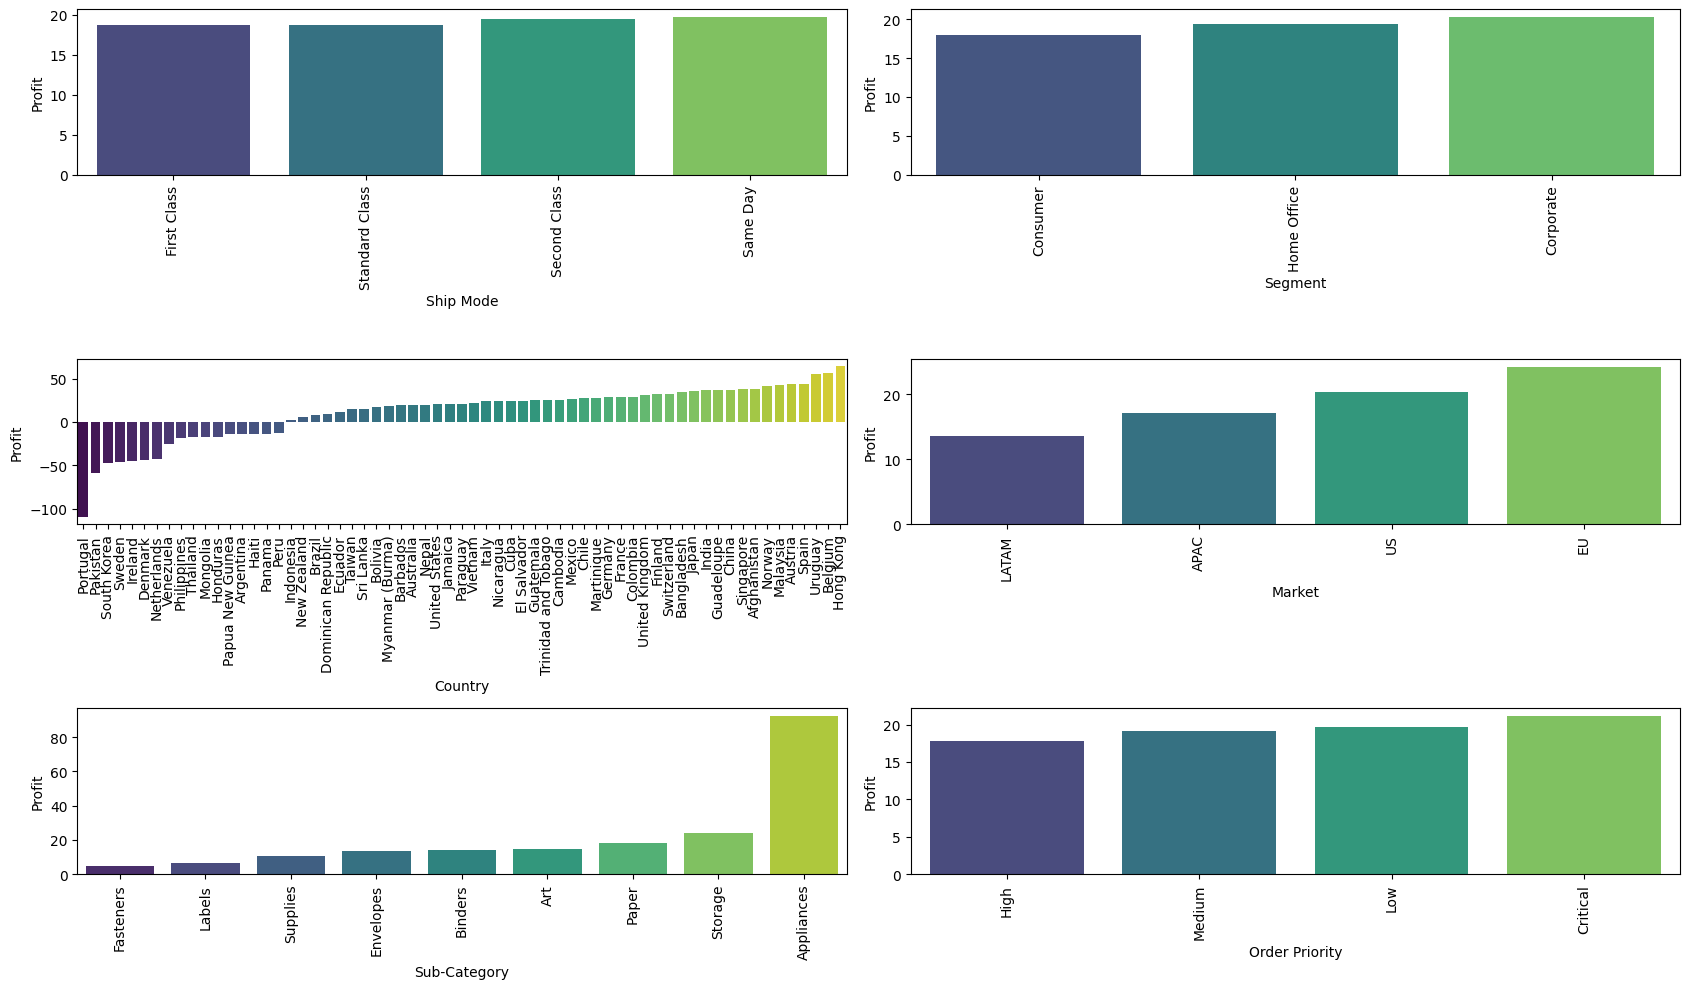

In [12]:
lista_col_categoricas = df.select_dtypes(exclude=np.number).columns
var_respuesta = "Profit"

analisis = fe.Analisis_Visual_Encoding(df, lista_col_categoricas, var_respuesta)
analisis.crear_barplot(tamano_grafica=(17, 10))

A primera vista parece que Ship mode, Segment y order priority no tienen orden, comprobémoslo:

In [13]:
var_respuesta = "Profit"
asuncion = fe.Asunciones(df, var_respuesta)

for col in lista_col_categoricas:
    print(f"Estamos analizando la variable {col.upper()}")
    asuncion.identificar_normalidad(metodo = "kolmogorov") 
    asuncion.identificar_homogeneidad(columna_categorica = col)
    test = fe.TestEstadisticos(df, var_respuesta, col)
    test.run_all_tests()
    print("\n###########################\n")

Estamos analizando la variable SHIP MODE
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Ship Mode las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Standard Class', 'Second Class', 'First Class', 'Same Day']

Realizando test de Kruskal...
Estadístico de prueba: 0.47619705108982663
Valor p: 0.9240888174894543
>>>>>>>>> NO hay evidencia suficiente para concluir que hay una diferencia significativa.

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable SEGMENT
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Segment las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Corporate', 'Consumer', 'Home Office']

Realizando test de Kruskal...
Estadístico de prueba: 0.7697900923504407
Valor p: 0.680522055849248
>>>>>>>>> NO hay evidencia suficiente para concluir que hay una diferencia significativa.

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable COUNTRY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Country las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['United States', 'China', 'France', 'Italy', 'United Kingdom', 'Germany', 'Australia', 'Nicaragua', 'Indonesia', 'Mexico', 'Netherlands', 'Spain', 'India', 'Philippines', 'Colombia', 'New Zealand', 'Brazil', 'Belgium', 'Austria', 'Japan', 'Thailand', 'Portugal', 'Dominican Republic', 'Pakistan', 'Vietnam', 'Sweden', 'Myanmar (Burma)', 'El Salvador', 'Cuba', 'South Korea', 'Honduras', 'Bolivia', 'Finland', 'Malaysia', 'Chile', 'Ireland', 'Singapore', 'Guatemala', 'Argentina', 'Panama', 'Haiti', 'Venezuela', 'Norway', 'Martinique', 'Uruguay', 'Afghanistan', 'Cambodia', 'Bangladesh', 'Peru', 'Hong Kong', 'Denmark', 'Switzerland', 'Taiwan', 'Ecuador', 'Trinidad and Tobago', 'Jamaica', 'Paraguay', 'Sri Lanka', 'Ba

,meandiff,p-adj,lower,upper,group_diff
41,-96.7438,0.0372,-191.6517,-1.8359,Afghanistan-Pakistan
47,-147.1810,0.0001,-256.9878,-37.3741,Afghanistan-Portugal
62,33.7811,0.0499,0.0036,67.5586,Argentina-Australia
63,57.9635,0.0009,10.7380,105.1889,Argentina-Austria
66,70.1374,0.0005,14.2212,126.0537,Argentina-Belgium
...,...,...,...,...,...
1916,67.6603,0.0018,10.8622,124.4583,Sweden-Vietnam
1933,48.7589,0.0004,10.1121,87.4056,Thailand-United Kingdom
1934,38.0188,0.0255,1.5794,74.4583,Thailand-United States
1945,-57.0749,0.0002,-101.4453,-12.7046,United Kingdom-Venezuela



###########################

Estamos analizando la variable MARKET
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Market las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['US', 'APAC', 'EU', 'LATAM']

Realizando test de Kruskal...
Estadístico de prueba: 372.4542517246702
Valor p: 2.047504011544997e-80
>>>>>>>>> HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LOS DATOS

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,7.1573,0.0028,1.8795,12.4352,APAC-EU
3,-10.6835,0.0000,-16.0340,-5.3329,EU-LATAM
5,6.7721,0.0080,1.3052,12.2391,LATAM-US



###########################

Estamos analizando la variable SUB-CATEGORY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Sub-Category las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Binders', 'Supplies', 'Appliances', 'Storage', 'Art', 'Paper', 'Envelopes', 'Labels', 'Fasteners']

Realizando test de Kruskal...
Estadístico de prueba: 1084.5972471618272
Valor p: 8.122116571877477e-229
>>>>>>>>> HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LOS DATOS

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-77.5324,0.0000,-88.6521,-66.4128,Appliances-Art
1,-78.4344,0.0000,-89.1133,-67.7554,Appliances-Binders
2,-78.6275,0.0000,-90.9193,-66.3356,Appliances-Envelopes
3,-87.3271,0.0000,-99.6758,-74.9784,Appliances-Fasteners
4,-85.8642,0.0000,-97.9670,-73.7614,Appliances-Labels
5,-74.2957,0.0000,-85.6184,-62.9731,Appliances-Paper
6,-68.3767,0.0000,-79.3796,-57.3737,Appliances-Storage
7,-81.9048,0.0000,-94.2388,-69.5709,Appliances-Supplies
13,9.1557,0.0188,0.8262,17.4853,Art-Storage
19,10.0577,0.0018,2.3263,17.7891,Binders-Storage



###########################

Estamos analizando la variable ORDER PRIORITY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Order Priority las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Low', 'High', 'Critical', 'Medium']

Realizando test de Kruskal...
Estadístico de prueba: 4.03104587056306
Valor p: 0.25813119255848604
>>>>>>>>> NO hay evidencia suficiente para concluir que hay una diferencia significativa.

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################



Hemos confirmado nuestras sospechas, por lo que a las variables que no tienen orden les haremos un one-hot y al resto un target.

In [14]:
diccionario_encoding={"onehot":['Ship Mode', 'Segment', 'Order Priority'], "target":['Country', 'Market', 'Sub-Category']}
var_respuesta = "Profit"
encoding = fe.Encoding(df, diccionario_encoding, var_respuesta)

In [15]:
df_ohe, one_hot_encoder = encoding.one_hot_encoding()
df_ohe.drop(columns=diccionario_encoding["onehot"], inplace=True)
df_ohe.head()

,Country,Market,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,United States,US,Binders,5,0.2,1906.485,867.69,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,United States,US,Supplies,5,0.0,83.281,846.54,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,China,APAC,Appliances,12,0.0,1036.080,804.54,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,France,EU,Appliances,4,0.1,186.948,801.66,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Italy,EU,Appliances,14,0.0,3979.080,778.32,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df_ohe_target, target_encoder = encoding.target_encoding()
df_ohe_target.head(3)

,Profit,Country,Market,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,1906.485,20.327050,20.327050,13.818765,5,0.2,867.69,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,83.281,20.327050,20.327050,10.348320,5,0.0,846.54,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1036.080,37.298648,17.081114,92.253159,12,0.0,804.54,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Guardamos los encoders para las futuras predicciones:

In [17]:
with open('../../../datos/cluster_0/preprocesamiento/target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

with open('../../../datos/cluster_0/preprocesamiento/one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)


Guardamos el df la con el encoding hecho:

In [18]:
df_ohe_target.to_pickle("../../../datos/cluster_0/df_nonulls_encoded.pkl")